In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import requests
import io
from io import StringIO


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# url for 2012 election data
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

req = requests.get(url).text

poll_data = StringIO(req)

# setting the data to a csv file

poll_df = pd.read_csv(poll_data)
poll_df.head()


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [3]:
# info about the data retrieved
#poll_df.info()

In [4]:
# using pandas for common operations

#poll_df.describe()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


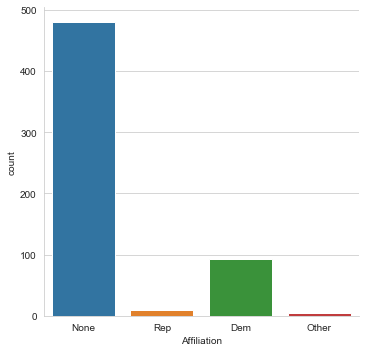

In [5]:
sns.factorplot('Affiliation',data=poll_df,kind="count")

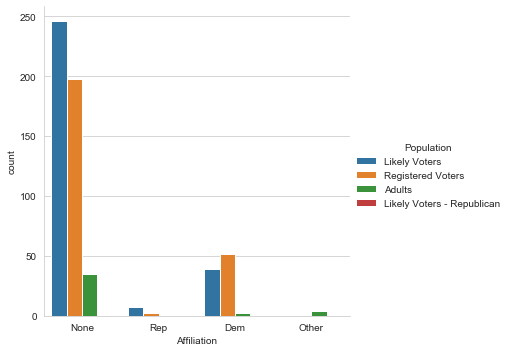

In [6]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind="count")

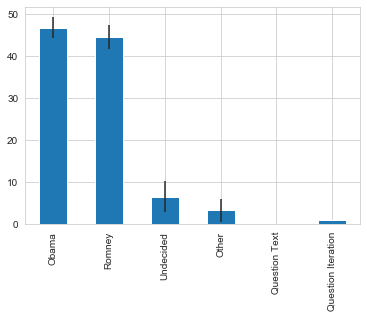

In [7]:
average = pd.DataFrame(poll_df.mean())
average.drop('Number of Observations',axis=0,inplace=True)

sd = pd.DataFrame(poll_df.std())


sd.drop('Number of Observations',axis=0,inplace=True)

average.plot(yerr=sd,kind='bar', legend=False)

In [8]:
poll_average = pd.concat([average,sd],axis=1)
poll_average.columns = ["Average","STD"]

poll_average

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


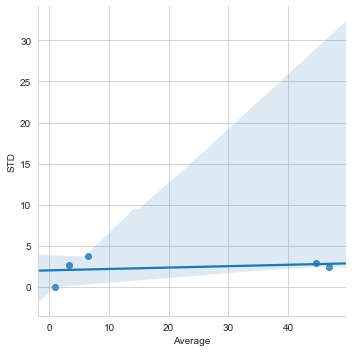

In [9]:
sns.lmplot(x='Average',y='STD',data=poll_average)

In [10]:
#poll_df.head()

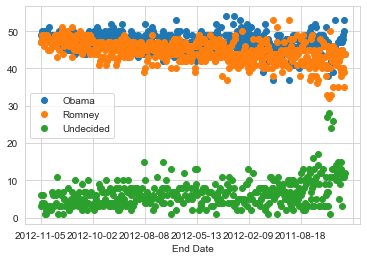

In [11]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

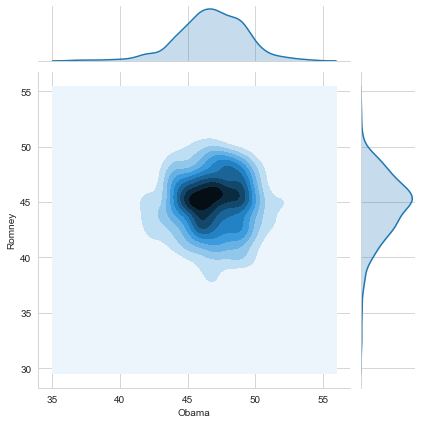

In [12]:
sns.jointplot(x='Obama',y='Romney',data=poll_df,kind="kde")

In [13]:
# difference by date b/w the two candidates

poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
#poll_df.head()

In [14]:
# sentiment in difference changes over time by date 

poll_diff = poll_df.groupby(['Start Date'], as_index=False).mean()

#poll_diff.head()

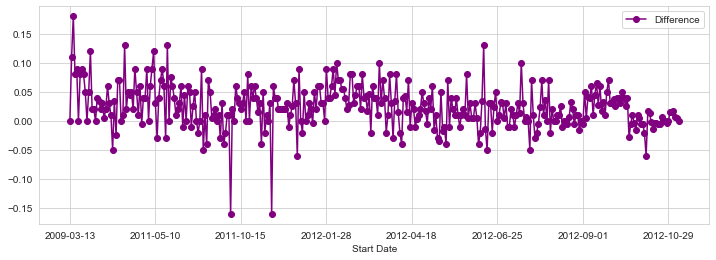

In [15]:
fig = poll_diff.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

# Donations to Federal Campaign

In [16]:
donor_df = pd.read_csv('Election_Donor_Data.csv')
donor_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [17]:
donor_mean=donor_df['contb_receipt_amt'].mean()
donor_std = donor_df['contb_receipt_amt'].std()

In [18]:
print("Average donation: ",donor_mean)
print("STD: ",donor_std)

Average donation:  298.2351500951093
STD:  3749.666723269043


In [25]:
highest_donor = donor_df['contb_receipt_amt'].copy()
highest_donor.sort_values()
#highest_donor

#eliminating the 0ve values
highest_donor = highest_donor[highest_donor>0]
highest_donor.sort_values()
highest_donor.head()

0    250.0
1     50.0
2    250.0
3    250.0
4    300.0
Name: contb_receipt_amt, dtype: float64

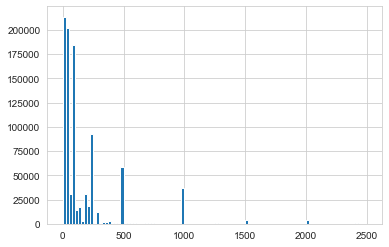

In [26]:
com_don = highest_donor[highest_donor < 2500]
com_don.hist(bins=100)

In [27]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [28]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13140
Cain, Herman                       20107
Gingrich, Newt                     47679
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Obama, Barack                     593746
Paul, Ron                         143757
Pawlenty, Timothy                   4555
Perry, Rick                        13575
Roemer, Charles E. 'Buddy' III      5920
Romney, Mitt                      107229
Santorum, Rick                     46559
Name: contb_receipt_amt, dtype: int64

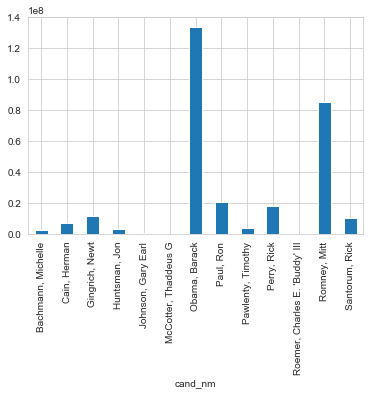

In [36]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_amount.plot(kind='bar')

In [40]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}


donor_df['Party'] = donor_df.cand_nm.map(party_map)

occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [ ]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')
